[Link to our site](https://lindsayhardy17.github.io/)

# <center>Evaluating the changes in art museums </center>
### <center>Lindsay Hardy and Emily O'Connell </center>

### Milestone 1 Write-up

For our project, we will be analyzing a [dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artworks.csv) concerning the collection of the Museum of Modern Art (MoMA). In late 2019, MoMA underwent [renovations](https://time.com/5688507/moma-reopening/) and reorganization of its galleries to feature more recent contemporary artists and global art. Our overarching question is exploring whether or not MoMA fulfilled its goal of expanding the diversity of its art collection. In order to see if this shift was reflected in their collection and acquisitions, we will attempt to measure the overall diversity a work adds to the collection by analyzing the relevant aspects of the artwork such as the artist's nationality, the artist’s gender, the year the work was created, the year it was acquired, and various other factors. Although it is impossible to truly quantify the abstract concept of diversity, we believe that analyzing overall patterns in acquisitions will be helpful in determining whether or not MoMA has been successful in its goal of introducing new viewpoints to its collection. 

For example, we will answer questions such as: is there an overwhelming number of male artists represented?; has MoMA recently been acquiring artwork from non-American at a higher frequency than in the past?; is the artwork acquired from non-American artists from Western European countries or elsewhere?; how does the average age of a work of art change in different time periods. By answering all of these smaller questions, we will be able to make a judgement on our overall  research question of assessing the diversity of the collection in recent years. We will also look at the trends over time to see if there are changes in what kind of artwork MoMA typically collects and note any differences between time periods. We have found a rich and detailed dataset with 138,219 works of art owned by MoMA acquired from 1929 to June of 2020, so we will have a lot of information pertaining to the type of artwork MoMA has acquired in different time periods.  

In addition to the thorough analysis we will conduct on MoMA dataset, we also plan to compare the MoMA’s collection to other large modern/contemporary art museums like the [Tate](https://github.com/tategallery/collection), a modern art museum in London. Through a comparison of the Tate and the MoMA we will be able to see if there are any differences in collections and trends between museums in two different countries. We will also investigate the collection of the [Metropolitan Museum of Art](https://github.com/metmuseum/openaccess), another famous art museum in New York City. Even though the Met is not specifically focused on modern art, we will be able to key into its modern/contemporary art collection and only focus specifically on those works. By comparing the MoMA to these other museums we will be able to see if they not only reached their goals but if their goals place them as a forward thinker on modern art and not just a part of the crowd. 

In terms of collaboration, we have set up a [GitHub repository](https://github.com/lindsayhardy17/lindsayhardy17.github.io)and plan for storing the datasets, sharing code, and version control. We plan to meet on Zoom once a week on Tuesdays at 3:10, right after class, and will also be flexible with adding a second time to meet on Thursday after class as well.  During these meetings we plan to check our progress, solve problems, and ask questions, in addition to communicating outside of scheduled meetings as needed.







### Milestone - Data Extraction, Cleaning, and Loading

The first thing that we needed to do was unzip our files. We originally tried to pull the data from the github repo, but the MoMA has a no pull policy. So instead we downloaded the data from kaggle.

In [1]:
import pandas as pd
import zipfile
import numpy as np
import re
import datetime
import matplotlib.pyplot as plot
import matplotlib.ticker as ticker
!pip install plotly==4.11.0
import plotly.graph_objects as go

     |████████████████████████████████| 13.1 MB 11.7 MB/s eta 0:00:01   |████▊                           | 1.9 MB 1.8 MB/s eta 0:00:07     |█████████▍                      | 3.8 MB 1.8 MB/s eta 0:00:06     |██████████▏                     | 4.1 MB 1.8 MB/s eta 0:00:05
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=ea2d8f6596fa70f1663cdb1c5fe8d3814c139802ba0d1ac3f1cc4fddff368c5f
  Stored in directory: /home/jovyan/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


For this first milestone the only things we needed were zipfile and pandas. So We unzipped the files and placed them in a working form in our folder

In [2]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

Next we read in the Artworks file and the Artists file and created a new dataframe called gender. We will be analyzing the gender and nationality of the artists so we wanted it in our main dataframe. Originally we tried to merge the two dataframes on 'Artist ID', but upon a closer look, "Artist ID" had multiple ids in the artworks dataframe but not in the artists dataframe. Some had up to 5 ids while others only had 1. Because of this we decided to just merge on "Name" because of its consistence across both dataframes. Once we merged we renamed the dataframe "moma". The resulting dataframe is made up of the works title, the artist and their background, the name of the work, information on the medium and different measurement types, when the moma acquired the work, and a couple other minor things. We are looking to analyze the dataframe to find insights on the dates that they were acquired with regard to when the works were made and if there were significant changes in the works acquired after a certain year. We think with this dataset we will be able to do all of these things because of the columns below, but will need to make sure that the columns are in the correct format.

In [3]:
moma_artworks = pd.read_csv("Artworks.csv")
moma_artists = pd.read_csv("Artists.csv")
moma_artists.columns

Index(['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year',
       'Death Year'],
      dtype='object')

In [4]:
gender = moma_artists[["Gender", 'Name', 'Nationality', 'Birth Year','Death Year']]
moma = moma_artworks.merge(gender, on = ['Name'], how = 'left')
moma['Gender'] = moma['Gender'].replace({'male':'Male'})
moma.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),Gender,Nationality,Birth Year,Death Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,48.6000,NaN,168.9000,NaN,NaN,NaN,Male,Austrian,1841.0,1918.0
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,40.6401,NaN,29.8451,NaN,NaN,NaN,Male,French,1944.0,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,34.3000,NaN,31.8000,NaN,NaN,NaN,Male,Austrian,1876.0,1957.0
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,50.8000,NaN,50.8000,NaN,NaN,NaN,Male,NaN,1944.0,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,38.4000,NaN,19.1000,NaN,NaN,NaN,Male,Austrian,1876.0,1957.0


Then we checked on the datatypes, everything looked like it was the right type of object except for the dates, so we first changed Acquisition Date

In [5]:
display(moma.dtypes)
#checked to see if the values are correct, the date and the acquisition date aren't in date time so converting them
moma['Acquisition Date'] = pd.to_datetime(moma['Acquisition Date'], errors = 'coerce')
#changed to datetime
moma.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Date                   object
Medium                 object
Dimensions             object
Acquisition Date       object
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
Gender                 object
Nationality            object
Birth Year            float64
Death Year            float64
dtype: object

Artwork ID                     int64
Title                         object
Artist ID                     object
Name                          object
Date                          object
Medium                        object
Dimensions                    object
Acquisition Date      datetime64[ns]
Credit                        object
Catalogue                     object
Department                    object
Classification                object
Object Number                 object
Diameter (cm)                float64
Circumference (cm)           float64
Height (cm)                  float64
Length (cm)                  float64
Width (cm)                   float64
Depth (cm)                   float64
Weight (kg)                  float64
Duration (s)                 float64
Gender                        object
Nationality                   object
Birth Year                   float64
Death Year                   float64
dtype: object

While we were checking the different values we realized that the Date, the year the artword was created, had a lot of different problems and could not be analyzed because of its different date representations, like having 1967-1977, or c. 1989, or early 1992. Because of this we had to fix the Date column, which is shown below. Having this column be correct is very important to us because the date of creation is crucial to our analysis.

In [6]:
moma['Date'].unique()[:100]
#a small sample of the unique types and their differences 

array(['1896', '1987', '1903', '1980', '1976-77', '1968', '1900', '1978',
       '1905', '1906', '1979', '1980-81', '1918', '1970', '1975', '1984',
       '1986', '1974', 'n.d.', 'c. 1917', '1917', '1923', 'Unknown',
       '1930', '1936', '1935', '1937', '1938', '1977', '1958', '1985',
       '1989', '1949', '1958–1964', 'c. 1935', '1991', '1941', '1965',
       '1981', '1983', '1985–1988', 'c. 1989-91', '1992', '1915-17',
       'c. 1915-17', '1953', '1910', 'c.1985', '1982–1986', '1982-86',
       '1945', '1923–1924', '.1-3 1987; .4 1990', '1990', '1976', '1995',
       '1927–1931', 'c. 1929-30', '1964', '1959', 'c. 1918-20',
       'c.1918-1920', '1939', 'c.1976', '1975-79', '1993', '1996', '1988',
       '1982-83', '1982–1983', '1952-53', '1921', '1957', '1972',
       '1956-57', '1924', '1962', '1925', '1960', '1969', '1963', '1994',
       '1961', '1960-61', '1952', 'c. 1978-84', '1927', '1979–1985',
       'before 1933', '1929', 'c. 1960-62', '1967', '1956', 'c. 1961',
       '

In [7]:
n_d = moma[(moma["Date"] == "nan") | (moma["Date"] == "n.d") | (moma["Date"] == "Unkn") | (moma["Date"] == "Unknown") | (moma["Date"] == "Various") | (moma["Date"] == "unknown")].index
moma.drop(n_d, inplace = True)

First we removed the obvious components that were incorrect, but then realized the large extent to which the dataset had issues, so we used regular expressions to extract a date, shown below, and then checked the remaining dates that were not in the correct format that we missed

In [8]:
moma['date_edit'] = moma['Date'].str.extract('(\d{4})', expand = False)
#creating a new column to store the dates
moma[(moma['date_edit'].isnull() == True) & (moma['Date'].isnull() == False)]['Date'].unique()
#checking where the date_edit is null but the Date is true - these will be the remaining dates that could
#not be converted to a correct date format with four numbers

array(['n.d.', '8th-9th century C.E.', '7th-8th century C.E.', 'Unkown',
       '(London?, published in aid of the Comforts Fund  for Women and Children of Sovie',
       '(n.d.)', 'New York', 'November 10', '(19)71', '(19)69',
       'date of publicati', 'nd', 'no date',
       '(newspaper published March 30)', 'n. d.', 'c. 196?', 'TBC', 'TBD'],
      dtype=object)

Because none of these dates had any meaning to us, we could officially switch over to have the date_edit column be our official date column, which we do below

In [9]:
moma['Date'] = moma['date_edit']
moma.drop(columns=['date_edit'], inplace = True)
moma['Date'].unique()
#one last check to make sure that all of our corresponding values are actually dates

array(['1896', '1987', '1903', '1980', '1976', '1968', '1900', '1978',
       '1905', '1906', '1979', '1918', '1970', '1975', '1984', '1986',
       '1974', nan, '1917', '1923', '1930', '1936', '1935', '1937',
       '1938', '1977', '1958', '1985', '1989', '1949', '1991', '1941',
       '1965', '1981', '1983', '1992', '1915', '1953', '1910', '1982',
       '1945', '1990', '1995', '1927', '1929', '1964', '1959', '1939',
       '1993', '1996', '1988', '1952', '1921', '1957', '1972', '1956',
       '1924', '1962', '1925', '1960', '1969', '1963', '1994', '1961',
       '1933', '1967', '1934', '1940', '1946', '1955', '1997', '1922',
       '1942', '1954', '1916', '1973', '1926', '1932', '1947', '1943',
       '1944', '1966', '1971', '1999', '1951', '1913', '1928', '1886',
       '1920', '1950', '1931', '1901', '1948', '1912', '1908', '1902',
       '1904', '1998', '1898', '1875', '1880', '1909', '1501', '1897',
       '1907', '1895', '1914', '1885', '1768', '1878', '1808', '1865',
       '1

After we officially had all the values as dates we converted them to a date time

In [10]:
# convert the strings back to integers
moma['Date'] = pd.to_datetime(moma['Date'], errors="coerce")
moma['Date'] = moma['Date'].dt.year

One of the main things that we will be looking at is when the MoMA acquired the work of art. Without this knowledge we won't be able to see if they really changed following their addition. Because of this we removed works that did not have a date from the original dataframe moma. We decided not to remove the date of the creation of art for right now because we believe those works could potentially be useful.

In [11]:
no_date = moma[(moma['Acquisition Date'].isnull() == True)].index
moma.drop(no_date, inplace = True)
#dropped dates that didn't have an acquisition date

We realized we needed to add an age in to see when the artist created the work, because that could be something interesting to analyze

In [12]:
moma['age_made'] = moma['Date'] - moma['Birth Year']
moma['alive?'] = moma['Date']

In [15]:
def test(acquisition,death):
    if acquisition > death:
        return 'False'
    else:
        return 'True'
moma['Acquisition Year'] = moma['Acquisition Date'].dt.year
moma['alive?'] = moma.apply(lambda row: test(row['Acquisition Year'],row['Death Year']),axis=1)

We used apply above to check each row to see if the artist was alive when the work was acquired, then made a column called alive? that was true if they were alive and false if they weren't

In [16]:
ids = moma[['Artwork ID', 'Artist ID']]
names_dates_moma = moma[['Title', 'Name', 'Date', 'Acquisition Date', 'Artwork ID', 'Gender', 'Credit', 'Nationality','age_made'
                   , 'alive?']]
dimensions = moma[['Artwork ID','Dimensions', 'Diameter (cm)',
       'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)']]
credit = moma[['Artwork ID','Credit']]
extra = moma[['Medium', 'Department', 'Classification', 'Artwork ID']]

In [17]:
names_dates_moma.head()

,Title,Name,Date,Acquisition Date,Artwork ID,Gender,Credit,Nationality,age_made,alive?
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,1896.0,1996-04-09,2,Male,Fractional and promised gift of Jo Carole and ...,Austrian,55.0,False
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1987.0,1995-01-17,3,Male,Gift of the architect in honor of Lily Auchinc...,French,43.0,True
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,1903.0,1997-01-15,4,Male,Gift of Jo Carole and Ronald S. Lauder,Austrian,27.0,False
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,1980.0,1995-01-17,5,Male,Purchase and partial gift of the architect in ...,NaN,36.0,True
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,1903.0,1997-01-15,6,Male,Gift of Jo Carole and Ronald S. Lauder,Austrian,27.0,False


## Milestone 2

In order to do through analysis we should compare the MoMA's data to data from other museums. The first museum that we will examine is the Tate, another museum for modern and contemporary art located in London, England.

In [18]:
tate_artworks = pd.read_csv("artwork_data-tate.csv")
tate_artists = pd.read_csv("artist_data-tate.csv")

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
display(tate_artworks.head())
tate_artists.head() 

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


After examining the data set you can see they have a lot of different columns that are not needed because of their repetition, or because we won't be using them in the future. So we created new data sets without them below.

In [20]:
tate_newartist = tate_artists[['name','gender','placeOfBirth','yearOfBirth','yearOfDeath']]

In [21]:
tate_newartworks = tate_artworks[['id','accession_number','artist','artistRole','artistId','title','medium','year'
                                 ,'acquisitionYear','dimensions']]

Next we merged the artist and the artworks data together, in the artist dataset the artist column is called artists, and in the artworks it is called name. We merged this on left so that if there is an artist who doesn't have an artwork they don't show up.

In [22]:
tate = tate_newartworks.merge(tate_newartist, left_on = ['artist'],right_on = ['name'], how = 'left')

Then we dropped the name column because we would no longer need it

In [23]:
tate = tate.drop(columns = ['name'])

Then, like we did for the MoMA, we removed the rows where the acquisition year was not present. 

In [24]:
no_date = tate[(tate['acquisitionYear'].isnull() == True)].index
tate.drop(no_date, inplace = True)

When examining the dates we noticed that they were not as wonky as the other one so we only had to change two dates.

In [25]:
tate['year'].unique()

array([nan, 1785.0, 1826.0, 1828.0, 1825.0, 1803.0, 1794.0, 1789.0,
       1786.0, 1800.0, 1790.0, 1805.0, 1779.0, 1870.0, 1871.0, 1866.0,
       1877.0, 1873.0, 1872.0, 1879.0, 1875.0, 1862.0, 1863.0, 1861.0,
       1880.0, 1821.0, 1840.0, 1846.0, 1874.0, 1860.0, 1852.0, 1850.0,
       1845.0, 1844.0, 1827.0, 1829.0, 1831.0, 1830.0, 1812.0, 1814.0,
       1869.0, 1881.0, 1851.0, 1843.0, 1864.0, 1865.0, 1788.0, 1876.0,
       1858.0, 1859.0, 1849.0, 1885.0, 1818.0, 1893.0, 1806.0, 1837.0,
       1810.0, 1807.0, 1808.0, 1809.0, 1811.0, 1816.0, 1822.0, 1833.0,
       1817.0, 1931.0, 1959.0, 1916.0, 1917.0, 1951.0, 1900.0, 1899.0,
       1902.0, 1953.0, 1933.0, 1974.0, 1819.0, 1820.0, 1967.0, 1969.0,
       1979.0, 1983.0, 1989.0, 1992.0, 1993.0, 1994.0, 1997.0, 1998.0,
       1999.0, 2000.0, 1981.0, 1985.0, 1996.0, 1991.0, 1971.0, 2004.0,
       2002.0, 2005.0, 2006.0, 1975.0, 2001.0, 1973.0, 2003.0, 1963.0,
       1976.0, 1977.0, 1960.0, 1990.0, 1988.0, 2007.0, 1964.0, 1970.0,
       19

In [26]:
tate['year'].replace({'no date':np.nan, 'c.1997-9':1997}, inplace = True)

Next we made two new columns, one that is the age of the person when they made the work, and the next is a column that will tell if a person was alive or not when the work was acquired by the MoMA

In [27]:
tate['age_made'] = pd.to_numeric(tate['year']) - tate['yearOfBirth']
tate['alive?'] = tate['year']

Finally we utilized the same function and apply method as we did above to make a column determining if the artist was alive or not.

In [28]:
def test(acquisition,death):
    if acquisition > death:
        return 'False'
    else:
        return 'True'
tate['alive?'] = tate.apply(lambda row: test(row['acquisitionYear'],row['yearOfDeath']),axis=1)

Next we noticed that the placeOfBirth column contained both the city and the country for the majority of the artists. We realized that in order to analyze the country that the artists were from we needed to separate the city from the country, so we made a new column called countryOfOrigin that contained just the country.

In [29]:
def country(place):
    new = str(place).split(',')
    if len(new) > 1:
        first = re.sub(r"^\s+", "", new[1])
        return first
    else:
        return new[0]
tate['countryOfOrigin'] = tate.apply(lambda row: country(row['placeOfBirth']), axis=1)

After each of those steps our dataframe is now clean and in the format that we want it in, which is displayed below.

In [29]:
tate.head()

,id,accession_number,artist,artistRole,artistId,title,medium,year,acquisitionYear,dimensions,gender,placeOfBirth,yearOfBirth,yearOfDeath,age_made,alive?,countryOfOrigin
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,support: 394 x 419 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,support: 311 x 213 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,support: 343 x 467 mm,Male,"London, United Kingdom",1762.0,1787.0,23.0,False,United Kingdom
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,support: 318 x 394 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,image: 243 x 335 mm,Male,"London, United Kingdom",1757.0,1827.0,69.0,False,United Kingdom


## Analysis: Trends in the MoMA Dataset

### Has MoMA acquired more diverse (based on gender and nationality) works of art in recent years?

In [30]:
# number of works by female artists acquired each year 
female_by_year = moma[moma.Gender == 'Female'].groupby(['Acquisition Year']).count()
female_by_year["Artwork ID"]

# number of works by non American artists acquired each year 
nonAmerican_by_year = moma[moma.Nationality != 'American'].groupby(['Acquisition Year']).count()

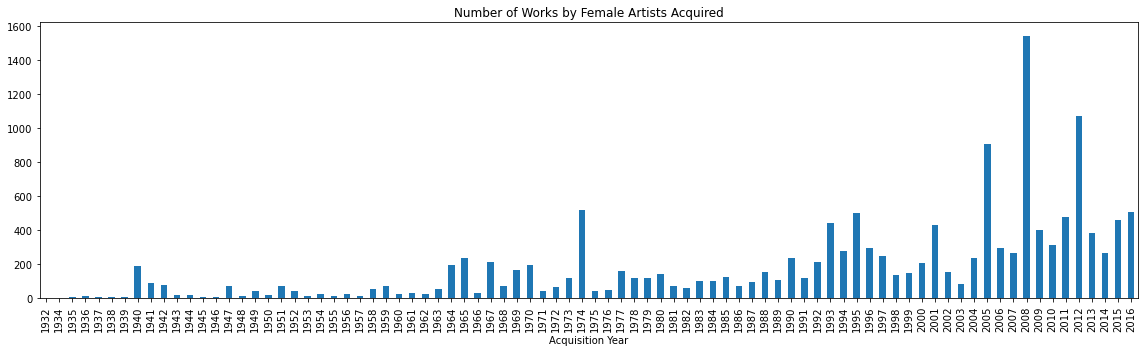

In [31]:
# The number of works by female acquired each year
female_graph = female_by_year["Artwork ID"].plot(kind='bar', figsize=(16, 5), title = "Number of Works by Female Artists Acquired")
female_graph.figure.tight_layout()
female_graph

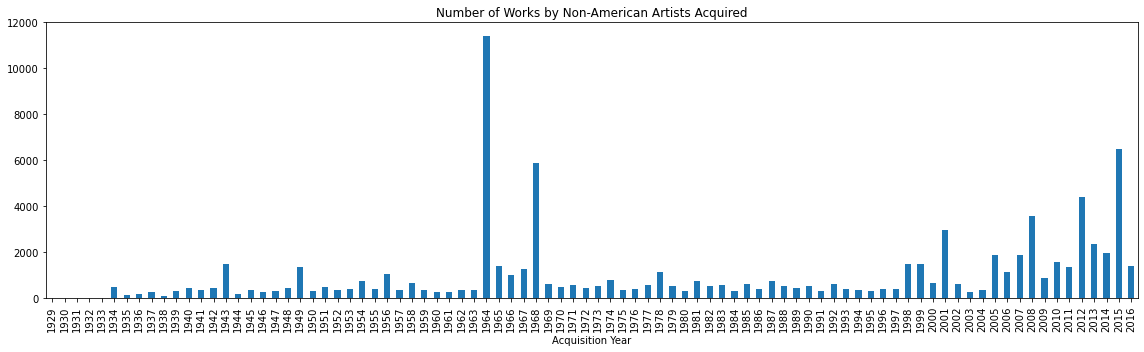

In [32]:
# The number of works by female acquired each year
nonAmerican_graph = nonAmerican_by_year["Artwork ID"].plot(kind='bar', figsize=(16, 5), title = "Number of Works by Non-American Artists Acquired")
nonAmerican_graph.figure.tight_layout()

<strong>Conclusion: </strong> There is no discernable pattern in the number of diverse works that MoMA acquires each year. However, in the past 20 years, there has been an increase in years that have a high number of works of art by female or nonAmerican artists.

## Analysis: Tate vs MoMA

The first analysis that we will do will show the difference in diversity of non-European artists between the MoMA and the Tate. The Tate uses the country name while the MoMA uses the designation. For example: American vs America, French vs France. So in order to do the analysis we need to be aware of this discrepancy. When deciding whether a country was designated as European or not we refered to a list of European countries from this website: https://datahub.io/opendatafortaxjustice/listofeucountries#resource-listofeucountries

The names of the countries for the Tate dataset were especially difficult to work with beacuse of the number of differences in the name titles. The majority of the names were in the countries native language or there was a city name rather than a country. Because of this we had to manually go through and check for what we wanted by looking at the unique values and then adding them to the list. 

In [33]:
tate['countryOfOrigin'].unique()

array(['United Kingdom', 'nan', 'Bharat', 'France', 'Italia', 'Viet Nam',
       'Deutschland', 'Rossiya', 'United States', 'Bahamas', 'Australia',
       'Ellás', 'België', 'Latvija', 'Canada', 'Éire', 'Schweiz',
       'Plymouth', 'Edinburgh', 'España', 'Nederland', 'Beckington',
       'Perth', 'Wimbledon', 'Canterbury', 'Danmark', 'Türkiye',
       'Österreich', 'Blackheath', 'Charlieu', 'Isle of Man',
       'Magyarország', 'Hrvatska', 'Chile', 'Epsom', 'Auteuil',
       'Kensington', 'South Africa', 'Mauritius', 'Rochdale', 'Melmerby',
       'Ukrayina', 'Sverige', 'Département de la', 'New Zealand',
       'România', 'Otok', 'Charlotte Amalie', 'Schlesien', 'Saint Hélier',
       'Polska', 'Misr', 'Bermondsey', 'Egremont', 'Norge', 'Braintree',
       'Liverpool', 'Belarus', 'Stoke on Trent', 'Zhonghua', 'Portugal',
       'Cuba', 'Moldova', 'Singapore', 'Nihon', 'Brasil', 'Staten Island',
       'México', 'Bosna i Hercegovina', 'Slovenija',
       'Slovenská Republika', 'Ceská 

First we replaced "nan" with np.nan and then we created a new dataframe that didn't contain any np.nans for country of origin

In [34]:
tate['countryOfOrigin'] = tate['countryOfOrigin'].replace({'nan':np.nan})
tate_country = tate[tate['countryOfOrigin'].isnull() == False]
#designation wasn't properly set so had to remove the works that didn't have a country of origin

Next we created a list of the countries, a function to make a new column and insert true or false if it was a european country or not.

In [35]:
countries_tate = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Germany',
'Greece','Hungary','Ireland','Italy','Latvia','Luxembourg','Lithuania','Malta','Netherlands','Poland','Portugal',
'Romania','Slovak Republic','Slovenia','Spain','Sweden','United Kingdom', 'Deutschland', 'Italia','London','Ceská Republika',
 'D.C.',  'Staten Island','Liverpool', 'Polska', 'România', 'España', 'Edinburgh', 'Canada','United States', 'Stoke on Trent',
                 'Ellás','België', 'Latvija','Nederland','Wimbledon','Canterbury', 'Danmark','Österreich','Blackheath',
                  'Bermondsey', 'Egremont', 'Norge', 'Braintree','Liverpool','Bristol','Eesti','Hertfordshire', 'Stockholm', 'Luxembourg'
                 ]
non_european = []
def european_tate(country):
    if country in countries_tate:
        return 'True'
    elif country == np.nan:
        return np.nan
    else:
        if country in non_european:
            return 'False'
        else:
            non_european.append(country)
            return 'False'        

Then we applied the function to the tate dataset

In [36]:
tate_country['European?'] = tate_country.apply(lambda row: european_tate(row['countryOfOrigin']), axis=1)

<ipython-input-36-a6071a616069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tate_country['European?'] = tate_country.apply(lambda row: european_tate(row['countryOfOrigin']), axis=1)


After getting the Tate the form that we want, it's time to get the MoMA in shape. The first thing that we need to do, like we did for the Tate is check out the nationality.

In [37]:
names_dates_moma['Nationality'].unique()

array(['Austrian', 'French', nan, 'American', 'German', 'Swedish',
       'British', 'Japanese', 'Italian', 'Argentine', 'Swiss',
       'Brazilian', 'Luxembourgish', 'Spanish', 'Dutch', 'Russian',
       'Iranian', 'Finnish', 'Danish', 'Belgian', 'Nationality unknown',
       'Mexican', 'Czech', 'Romanian', 'Polish', 'Cuban', 'Chilean',
       'Puerto Rican', 'Uruguayan', 'Venezuelan', 'Moroccan', 'Colombian',
       'Australian', 'Chinese', 'Yugoslav', 'Hungarian', 'Canadian',
       'Slovenian', 'Latvian', 'Nationality Unknown', 'Various', 'Greek',
       'Haitian', 'Israeli', 'Icelandic', 'Czechoslovakian', 'Croatian',
       'Norwegian', 'Thai', 'Algerian', 'Guatemalan', 'Indian',
       'Ukrainian', 'Irish', 'Costa Rican', 'Korean', 'Ethiopian',
       'Kuwaiti', 'Scottish', 'South African', 'Zimbabwean', 'Portuguese',
       'Panamanian', 'Ecuadorian', 'Peruvian', 'Congolese', 'Malian',
       'Turkish', 'Cambodian', 'Bosnian', 'Canadian Inuit', 'Slovak',
       'Estonian', 'Pak

From looking at these unique values we can see that there are a couple of ways to designate if a person had an unknown nationality, which we deal with below. But all the nationalities, if they exhist, are in English and in a correct format.

In [38]:
names_dates_moma['Nationality'].replace({'nan':np.nan,'Nationality unknown':np.nan,'Nationality Unknown':np.nan,
                                        'Various':np.nan,'nationality unknown':np.nan}, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In order to tell if the person is european or not, we mad a list of all the nationalities that the MoMA has that are non-European/Western nationalities.

In [39]:
nationalities_moma = ['Japanese',  'Argentine', 
 'Brazilian', 'Russian',
       'Iranian',
       'Mexican', 'Cuban', 'Chilean',
       'Puerto Rican', 'Uruguayan', 'Venezuelan', 'Moroccan', 'Colombian',
       'Australian', 'Chinese', 'Yugoslav', 'Latvian',
       'Haitian', 'Israeli', 'Icelandic', 'Thai', 'Algerian', 'Guatemalan', 'Indian',
       'Ukrainian', 'Costa Rican', 'Korean', 'Ethiopian',
       'Kuwaiti', 'South African', 'Zimbabwean',
       'Panamanian', 'Ecuadorian', 'Peruvian', 'Congolese', 'Malian',
       'Turkish', 'Cambodian', 'Bosnian', 'Canadian Inuit',
       'Estonian', 'Pakistani', 'Bolivian', 'Taiwanese', 'Paraguayan',
       'Nicaraguan', 'Tunisian', 'Sudanese', 'Tanzanian', 'Guyanese',
       'Senegalese', 'Bahamian', 'Lebanese', 'Kenyan',
       'Nigerian', 'Georgian', 'Egyptian', 'Albanian', 'Azerbaijani',
       'Ivorian', 'Malaysian', 'Singaporean', 'Serbian', 'Lithuanian',
       'Tajik', 'New Zealander', 'Namibian', 'Native American',
       'Ghanaian', 'Afghan', 'Ugandan',
       'Cameroonian', 'Welsh', 'Mauritanian', 'Palestinian', 'Syrian',
       'Saudi Arabian', 'Kazakhstani', 'Rwandan', 'Iraqi', 'Indonesian',
       'Vietnamese', 'Burkinabe', 'Macedonian', 'Kyrgyzstani', 'Filipino',
       'Mozambican', 'Angolan']

Then we made a function for the MoMA, like we had for the Tate, that designated if a person was European/Western or not, created a new column, and placed it in the MoMA dataframe.

In [40]:
def european_moma(country):
    if country in nationalities_moma:
        return 'False'
    elif country == np.nan:
        return np.nan
    else:
        return 'True'

In [41]:
names_dates_moma['European?'] = names_dates_moma.apply(lambda row: european_moma(row['Nationality']), axis=1)

<ipython-input-41-de5aecd4c201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_dates_moma['European?'] = names_dates_moma.apply(lambda row: european_moma(row['Nationality']), axis=1)


Similarly, we also want to find out which of the artists are American, so we added a column to designate wheter or not the artist was American. It could be interesting to compare this to the Tate data.

Now that the datasets are in similar formats we can start comparisons and anaylsis. But, the Tate data stopped collecting in 2013, so need to make MoMA align with them.

In [42]:
tate_country['acquisitionYear'].max()

2013.0

In [43]:
# create a new DataFrame of all of the works before 2013
d = datetime.datetime(2014, 1, 1)
moma_before_2013 = names_dates_moma[names_dates_moma['Acquisition Date'] < d]
moma_after_2013 = names_dates_moma[names_dates_moma['Acquisition Date'] > d]

### How does the diversity of the two museums compare?

#### Comparing Western vs non-Western Art in each museum

The first visualization that we made, compares the diversity of the artists at both the Tate and the MoMA by looking at how many artists are Western or non-Western.

In [44]:
# get the counts of works by Western and non-Western artists in MoMA before 2013
moma_European = moma_before_2013['European?'].value_counts()

In [45]:
# get the counts of works by Western and non-Western artists in the Tate
tate_European = tate_country['European?'].value_counts()

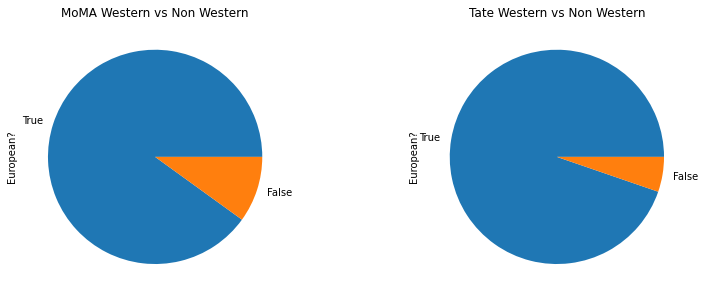

In [46]:
# create and format pie charts
fig, (ax1, ax2) = plot.subplots(1, 2)
moma_European.plot.pie(ax=ax1)
ax1.set_title("MoMA Western vs Non Western")

tate_European.plot.pie(ax=ax2)
ax2.set_title("Tate Western vs Non Western")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

<strong> Conclusion: </strong> This comparison shows that the MoMA, even before its renovation, was ahead of the Tate with regard to artists who were not of European or Western descent.

#### Comparing Art by Male vs Female artists in each museum

Next we chose to look at the differences in sizes of the male and female population at both the Tate and the MoMA, as this was another area that the MoMA was striving the improve.

In [47]:
# get the counts of works by male and female artists in MoMA before 2013
moma_gender = moma_before_2013['Gender'].value_counts()
#moma_after_2013['Gender'].value_counts().plot.pie()

In [48]:
# get the counts of works by male and female artists in the Tate
tate_gender = tate_country['gender'].value_counts()

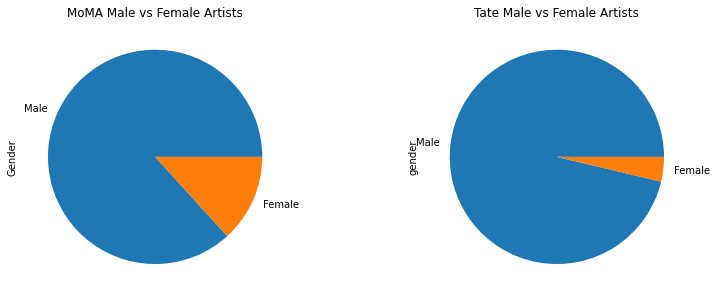

In [49]:
# create and format pie charts
fig, (ax3, ax4) = plot.subplots(1, 2)
moma_gender.plot.pie(ax=ax3)
ax3.set_title("MoMA Male vs Female Artists")

tate_gender.plot.pie(ax=ax4)
ax4.set_title("Tate Male vs Female Artists")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

<strong> Conclusion: </strong>This is an interesting comparison, as it once again shows that the MoMA has a greater diversity than the Tate did before its renovation, as it has a much larger proportion of female artists to male artists.

#### Comparing Art by Male vs Female artists of nonWestern art in each museum

What about the male/female ratio when looking at non-European/Western artists? 


In [50]:
# get the counts of Western and non-Western works by gender in MoMA before 2013
moma_western_gender = moma_before_2013[moma_before_2013['European?'] == 'False']['Gender'].value_counts()

In [51]:
# get the counts of Western and non-Western works by gender in the Tate
tate_western_gender = tate_country[tate_country['European?'] == 'False']['gender'].value_counts()

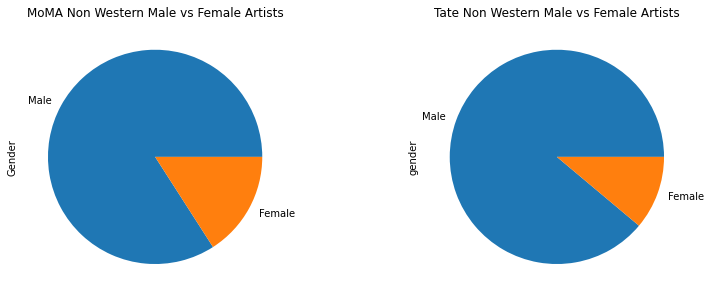

In [52]:
# create and format pie charts
fig, (ax5, ax6) = plot.subplots(1, 2)
moma_western_gender.plot.pie(ax=ax5)
ax5.set_title("MoMA Non Western Male vs Female Artists")

tate_western_gender.plot.pie(ax=ax6)
ax6.set_title("Tate Non Western Male vs Female Artists")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

<strong>Conclusion: </strong> The data shows that  MoMA has a larger of female non-Western/european artists than the Tate, but this difference is smaller than the one above.


### But what do these comparisons look like over time?

In order to really understand the comparisons above we need to see how they compare over time, for instance did the MoMA more recently acquire more european works? Or did the Tate always have a smaller number of works by female artists?

The first one we will compare is the change over time for acquisition of works by non-European artists

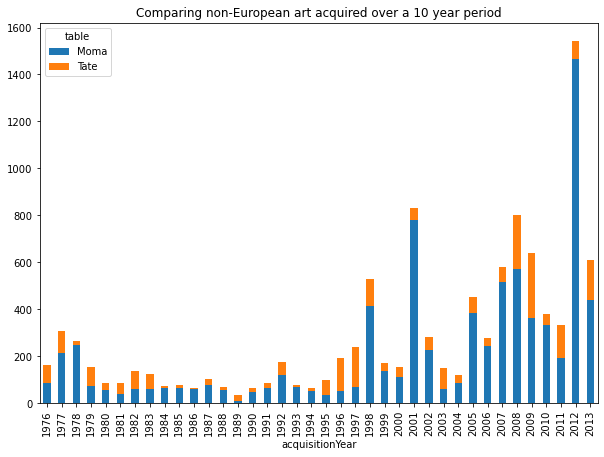

In [80]:
#create a new table grouping by the acquisition year artists who are non-European
acquisitionYear = pd.DataFrame(tate_country[tate_country['European?'] == 'False'].groupby('acquisitionYear')['European?'].value_counts())
#adding a new column that is the same as European and then removing European
acquisitionYear['count'] = acquisitionYear['European?']
acquisitionYear.drop(columns = ['European?'], inplace = True)
#resetting the index and dropping the old index
acquisitionYear = acquisitionYear.reset_index()
acquisitionYear.drop(columns = ['European?'], inplace = True)
#only taking the years from 1975 so that the analysis is more clear
acquisitionYear = acquisitionYear[acquisitionYear['acquisitionYear']>1975]
#setting the year as an integer
acquisitionYear['acquisitionYear'] = acquisitionYear['acquisitionYear'].astype(int)
#adding in the designation for which museum it is from
acquisitionYear['table'] = "Tate"
#making a pivot table out of the previous table
pivot = acquisitionYear.pivot(index='acquisitionYear', columns = 'table', values = 'count')

#walking through the same steps but for the MoMA table
moma_before_2013['acquisitionYear'] = moma_before_2013['Acquisition Date'].dt.year
acquisitionYear1 = pd.DataFrame(moma_before_2013[moma_before_2013['European?'] == 'False'].groupby('acquisitionYear')['European?'].value_counts())
acquisitionYear1['count'] = acquisitionYear1['European?']
acquisitionYear1.drop(columns = ['European?'], inplace = True)
acquisitionYear1 = acquisitionYear1.reset_index()
acquisitionYear1.drop(columns = ['European?'], inplace = True)
acquisitionYear1 = acquisitionYear1[acquisitionYear1['acquisitionYear']>1975]
acquisitionYear1['table'] = "Moma"
pivot1 = acquisitionYear1.pivot(index='acquisitionYear', columns = 'table', values = 'count')

#merging the two tables together on acquisitionYear
new = pivot1.merge(pivot, on = 'acquisitionYear')

#plotting the graph
new.loc[:,['Moma','Tate']].plot.bar(stacked=True, figsize=(10,7), title = "Comparing non-European art acquired over a 10 year period")

<strong>Conclusion:</strong> From this graph we can see that the majority of the time the MoMA each year has acquired more non-European art, with the acceptance of 1982,1983,1996, and 1997. So the MoMA didn't quickly catch up to the Tate, but rather had already been ahead.

Next we do a similar analysis for the non-European acquisition overtime, but this time for acquisition of art by a female artist

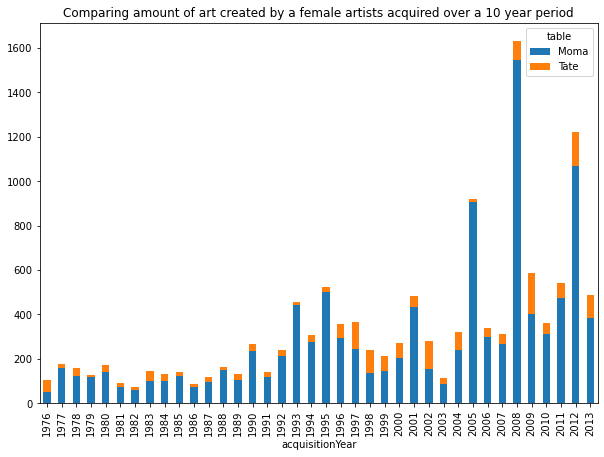

In [81]:
#we use the same process as above, with the exception of switching out the column European? for gender in each instance
acquisitionYear = pd.DataFrame(tate_country[tate_country['gender'] == 'Female'].groupby('acquisitionYear')['gender'].value_counts())
acquisitionYear['count'] = acquisitionYear['gender']
acquisitionYear.drop(columns = ['gender'], inplace = True)
acquisitionYear = acquisitionYear.reset_index()
acquisitionYear = acquisitionYear[acquisitionYear['acquisitionYear']>1975]
acquisitionYear['acquisitionYear'] = acquisitionYear['acquisitionYear'].astype(int)
acquisitionYear['table'] = "Tate"
acquisitionYear.drop(columns = ['gender'], inplace = True)
pivot = acquisitionYear.pivot(index='acquisitionYear', columns = 'table', values = 'count')

moma_before_2013['acquisitionYear'] = moma_before_2013['Acquisition Date'].dt.year
acquisitionYear1 = pd.DataFrame(moma_before_2013[moma_before_2013['Gender'] == 'Female'].groupby('acquisitionYear')['Gender'].value_counts())
acquisitionYear1['count'] = acquisitionYear1['Gender']
acquisitionYear1.drop(columns = ['Gender'], inplace = True)
acquisitionYear1 = acquisitionYear1.reset_index()
acquisitionYear1 = acquisitionYear1[acquisitionYear1['acquisitionYear']>1975]
acquisitionYear1['table'] = "Moma"
acquisitionYear1.drop(columns = ['Gender'], inplace = True)
pivot1 = acquisitionYear1.pivot(index='acquisitionYear', columns = 'table', values = 'count')

new = pivot1.merge(pivot, on = 'acquisitionYear')

new.loc[:,['Moma','Tate']].plot.bar(stacked=True, figsize=(10,7), title = "Comparing amount of art created by a female artists acquired over a 10 year period")


<strong>Conclusion:</strong> From this graph we can once again see that the MoMA over time dominates the Tate in its acquistion of art by female artists. Unlike the graph above that looked at non-European artists, there isn't a year that the MoMA does not acquire more art by a female artist than the Tate. This shows that the MoMA has continually been collecting more art by female artists over time.

### Do countries favor their own art over foreign art? Could this be a bias towards American or British art across many museums?

We next examined the proportion of British works in the Tate, the proportion of American works in the MoMA, the proportion of American works in the Tate, and the proportion of British works in MoMA to see if the museums tended to collect more work created by artists from their respective countries or if there was a significant bias towards American art in the Tate or British art in MoMA.

In [53]:
# find the proportion of British works in the Tate
tate_country = tate_country.assign(British=np.where(tate_country['countryOfOrigin']=="United Kingdom", True, False))
tate_British_prop = (tate_country["British"] == True).mean()

In [54]:
# Find the proportion of American art in MoMA
names_dates_moma = names_dates_moma.assign(American=np.where(names_dates_moma['Nationality']=="American", True, False))
moma_American_prop = (names_dates_moma["American"] == True).mean()

In [55]:
# Find the proportion of British art in MoMA
names_dates_moma = names_dates_moma.assign(British=np.where(names_dates_moma['Nationality']=="British", True, False))
moma_British_prop = (names_dates_moma["British"] == True).mean()
moma_British_prop

0.045582042655150395

In [56]:
# find the proportion of American works in the Tate
tate_country = tate_country.assign(American=np.where(tate_country['countryOfOrigin']=="United States", True, False))
tate_American_prop = (tate_country["American"] == True).mean()

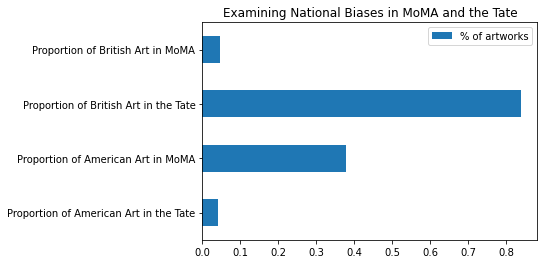

In [57]:
# Graph it!
plotdata = pd.DataFrame(
    {"% of artworks": [tate_American_prop, moma_American_prop, tate_British_prop, moma_British_prop]}, 
    index=["Proportion of American Art in the Tate", "Proportion of American Art in MoMA", "Proportion of British Art in the Tate", "Proportion of British Art in MoMA"])
plotdata.plot(kind="barh", title = "Examining National Biases in MoMA and the Tate")


<strong>Conclusion:</strong> It looks like both MoMA and the Tate favor art from their home country, with the Tate having a higher percentage of British art than MoMA has American art. There is roughly the same proportion of British art in MoMA as there is American art in the Tate.